## Вариант 1. Проект e-commerce

In [1]:
import pandas as pd
import numpy as np

import pingouin as pg

from datetime import timedelta
from operator import attrgetter

from dateutil import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
sns.set(
    font_scale = 2,
    style      ='whitegrid',
    rc         ={'figure.figsize':(20,7)}
)

Загрузим все датафреймы в юпитерхаб

In [69]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_customers_dataset.csv')

In [70]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_orders_dataset.csv')

In [71]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Cделаем предобработку данных переведем столбцы с датами object в datetime:


In [72]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [73]:
orders.shape

(99441, 8)

Соединим таблицы заказов и клиентов

In [74]:
ordersID = pd.merge(orders, customers[['customer_id','customer_unique_id']],on='customer_id', how='right') 

Проверим данные на пустые значения

In [75]:
ordersID.isna().sum() 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
dtype: int64

---

## 1 задание

Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [76]:
# Посмотрим на количество каждого статуса заказов:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Если столбец order_approved_at —  время подтверждения оплаты заказа не пустой, значит покупатель оплатил свой заказ 
и с тех пор он заказ считается покупкой.

In [77]:
# Посмотрим на пустые значения ячейки order_approved_at
ordersID.query('order_approved_at.isna()').order_status.value_counts().unique()

array([141,  14,   5])

Как оказалось клиенты не доходят до процесса оплаты судя по статусу заказа: 'canceled' - 141, 'delivered' - 14, 'created' - 5 

In [78]:
# Теперь найдем пользователей которые совершили покупку один раз:
ordersID.query('order_approved_at.notna()') \
      .groupby('customer_unique_id', as_index=False) \
      .agg({'order_id':'count'})\
      .rename(columns = {'order_id' : 'order_count'}) \
      .query('order_count == 1')  

,customer_unique_id,order_count
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,1
95993,fffea47cd6d3cc0a88bd621562a9d061,1
95994,ffff371b4d645b6ecea244b27531430a,1
95995,ffff5962728ec6157033ef9805bacc48,1


Итого у нас 93049 покупателей, которые купили только один раз

---------------------------------------------------------------------------------

## 2 задание

Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов).


Для начала определим, что доставка не осуществлена если в строке order_delivered_customer_date пустая.

In [79]:
#Давайте найдем причины не осуществленной доставки по годам

not_delivered = orders.query('order_delivered_customer_date.isna() & order_approved_at.notna()').groupby(orders.order_approved_at.dt.year).order_status.value_counts()

not_delivered

order_approved_at  order_status
2016.0             invoiced         18
                   canceled         15
                   shipped           9
                   unavailable       6
                   processing        2
2017.0             shipped         530
                   unavailable     458
                   processing      240
                   canceled        211
                   invoiced        175
                   approved          2
                   delivered         2
2018.0             shipped         568
                   canceled        252
                   unavailable     145
                   invoiced        121
                   processing       59
                   delivered         6
Name: order_status, dtype: int64

In [80]:
orders.query('order_approved_at.notna()').shape # количество оплученных заказов

(99281, 8)

In [81]:
not_delivered.sum() # общее количество не доставленных заказов

2819

In [82]:
round(not_delivered.sum() / 99281,3)*100

2.8000000000000003

В общей сложности по тем или иным причинам не доставлено 2819 заказов, что составляет более 2.8% от всех заказов.

In [83]:
#Чтобы найти среднее количество не доставленных заказов в месяц сначала найдем количество месяцев в нашем датафрейме между 
#минимальной и максимальной датой

minmax = orders['order_approved_at'].agg(['min', 'max'])

minmax

min   2016-09-15 12:16:38
max   2018-09-03 17:40:06
Name: order_approved_at, dtype: datetime64[ns]

In [84]:
# Напишем функцию, которая находит количество месяцев между двумя датами

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [85]:
# Итого в нашем случае 24 месяца между минимальной и максимальной датой 
diffs = diff_month(minmax.max(), minmax.min())
print(diffs)

24


In [86]:
cancelled_orders_month_mean = not_delivered / 24

cancelled_orders_month_mean.round(2)

order_approved_at  order_status
2016.0             invoiced         0.75
                   canceled         0.62
                   shipped          0.38
                   unavailable      0.25
                   processing       0.08
2017.0             shipped         22.08
                   unavailable     19.08
                   processing      10.00
                   canceled         8.79
                   invoiced         7.29
                   approved         0.08
                   delivered        0.08
2018.0             shipped         23.67
                   canceled        10.50
                   unavailable      6.04
                   invoiced         5.04
                   processing       2.46
                   delivered        0.25
Name: order_status, dtype: float64

Итого в среднем за месяц за два года не доставляется 117 заказов по тем или иным причинам

In [87]:
not_delivered_all = cancelled_orders_month_mean.groupby('order_status').sum().sort_values(ascending=False)

not_delivered_all.round(2)

order_status
shipped        46.12
unavailable    25.38
canceled       19.92
invoiced       13.08
processing     12.54
delivered       0.33
approved        0.08
Name: order_status, dtype: float64

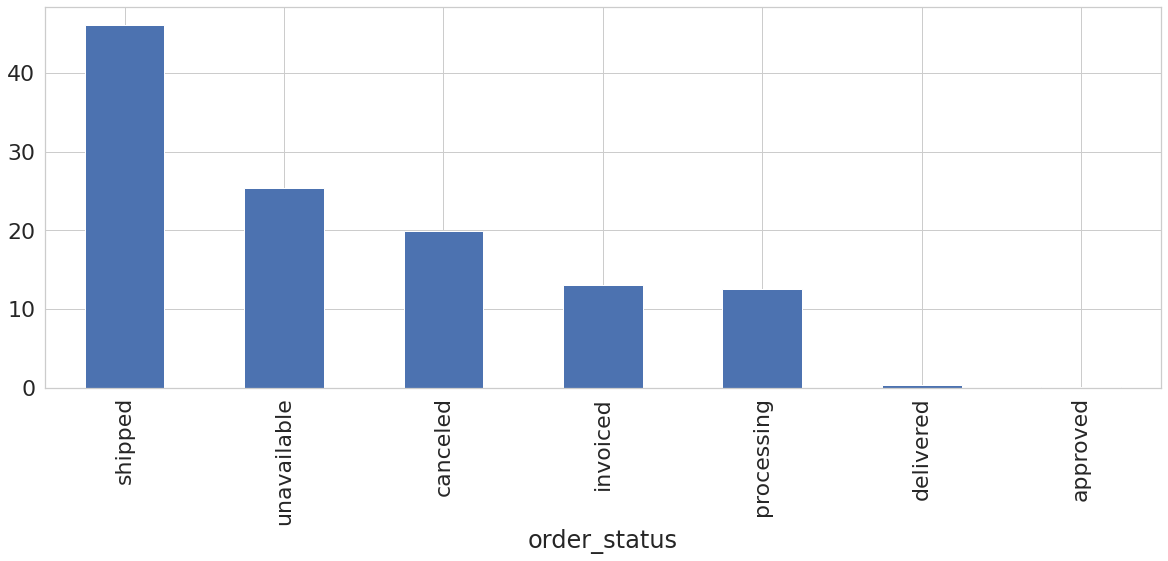

In [88]:
# Построим барплот чтобы нагляднее увидеть причины не доставки в общем

not_delivered_all.plot.bar()

--------------

## 3 задание

По каждому товару определить, в какой день недели товар чаще всего покупается.

In [89]:
# Прочитаем данные
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_order_items_dataset.csv')

In [90]:
# соединим таблицу items и orders
orders_w_i = pd.merge(orders, items[['order_id','product_id','price']],on='order_id', how='left')

In [91]:
# Посмотрим на пустые значения
orders_w_i.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
product_id                        775
price                             775
dtype: int64

Переведем даты в datetime64

In [92]:
orders_w_i['order_estimated_delivery_date'] = pd.to_datetime(orders_w_i['order_estimated_delivery_date'])
orders_w_i['order_purchase_timestamp'] = pd.to_datetime(orders_w_i['order_purchase_timestamp'])
orders_w_i['order_approved_at'] = pd.to_datetime(orders_w_i['order_approved_at'])
orders_w_i['order_delivered_customer_date'] = pd.to_datetime(orders_w_i['order_delivered_customer_date'])
orders_w_i['order_delivered_carrier_date'] = pd.to_datetime(orders_w_i['order_delivered_carrier_date'])
orders_w_i.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
price                                   float64
dtype: object

In [93]:
# Создадим колонку с днем сделанного заказа

orders_w_i['day_of_week_purchase'] = orders_w_i['order_purchase_timestamp'].dt.day_name() 

orders_w_i.day_of_week_purchase.head()

0       Monday
1      Tuesday
2    Wednesday
3     Saturday
4      Tuesday
Name: day_of_week_purchase, dtype: object

In [94]:
df = orders_w_i.groupby(['product_id','day_of_week_purchase'],as_index=False).agg({'order_id':'count'}) \
        .pivot(index = 'product_id', columns = 'day_of_week_purchase', values = 'order_id') \


In [95]:
df['max_value'] = df.max(axis=1) # Найдем максимальное число заказов в неделю

In [96]:
df['day_of_week'] = df.idxmax(axis=1) # Найдем день недели с максимальным значением

In [97]:
df.sort_values('max_value',ascending=False)

day_of_week_purchase,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,max_value,day_of_week
product_id,,,,,,,,,
422879e10f46682990de24d770e7f83d,77.0,64.0,57.0,47.0,79.0,67.0,93.0,93.0,Wednesday
99a4788cb24856965c36a24e339b6058,75.0,92.0,61.0,62.0,73.0,61.0,64.0,92.0,Monday
aca2eb7d00ea1a7b8ebd4e68314663af,87.0,78.0,59.0,55.0,89.0,85.0,74.0,89.0,Thursday
53b36df67ebb7c41585e8d54d6772e08,38.0,57.0,29.0,31.0,46.0,76.0,46.0,76.0,Tuesday
368c6c730842d78016ad823897a372db,67.0,50.0,44.0,54.0,58.0,63.0,52.0,67.0,Friday
...,...,...,...,...,...,...,...,...,...
62b07aff118f62756ee579afeedc3eb0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,Thursday
62ae6a8f5789aec14529a277c7516def,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,Sunday
62abef05dddbd149514e4339c84f7d7d,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,Sunday


Как видно из таблицы сверху у некоторых товаров имеются день недели с большим количеством заказов

------

## 4 задание

Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может 
быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [98]:
ordersID['order_estimated_delivery_date'] = pd.to_datetime(ordersID['order_estimated_delivery_date'])
ordersID['order_purchase_timestamp'] = pd.to_datetime(ordersID['order_purchase_timestamp'])
ordersID['order_approved_at'] = pd.to_datetime(ordersID['order_approved_at'])
ordersID['order_delivered_customer_date'] = pd.to_datetime(ordersID['order_delivered_customer_date'])
ordersID['order_delivered_carrier_date'] = pd.to_datetime(ordersID['order_delivered_carrier_date'])
ordersID['day_of_week_purchase'] = ordersID['order_purchase_timestamp'].dt.day_name()
ordersID.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
day_of_week_purchase                     object
dtype: object

In [99]:
ordersID['year_and_month_purchase'] = ordersID['order_purchase_timestamp'].dt.to_period('M') # Переведем колонку в формат datetime64

In [100]:
ordersID.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,day_of_week_purchase,year_and_month_purchase
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,861eff4711a542e4b93843c6dd7febb0,Tuesday,2017-05
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,290c77bc529b7ac935b93aa66c333dc3,Friday,2018-01
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,060e732b5b29e8181a18229c7b0b2b5e,Saturday,2018-05
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,259dac757896d24d7702b9acbbff3f3c,Tuesday,2018-03
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,345ecd01c38d18a9036ed96c73b8d066,Sunday,2018-07


In [101]:
df = ordersID.loc[:, ['customer_unique_id','order_approved_at','year_and_month_purchase','day_of_week_purchase']] # Отберем только необходимые данные

In [102]:
df.head()

,customer_unique_id,order_approved_at,year_and_month_purchase,day_of_week_purchase
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,Tuesday
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01,Friday
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,2018-05,Saturday
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03,Tuesday
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,2018-07,Sunday


Удалим неоплаченные заказы и посчитаем сколько заказов сделал клиент в определенный месяц

In [103]:
xd = df.query('order_approved_at.notna()') \
        .groupby(['customer_unique_id','year_and_month_purchase'], as_index=False) \
        .agg({'order_approved_at' : 'count'}) \
        .sort_values('order_approved_at', ascending = False) 

Напишем функцию которая считает сколько недель в месяце(с учетом дней) и применим ее на нашу таблицу

In [104]:
import datetime
import calendar

def week_of_month(x):

    days_this_month = calendar.mdays[x.month]
    currentDate = datetime.date.today()
    xd = datetime.date(x.year, x.month, calendar.monthrange(x.year, x.month)[1])
    return round(xd.day/ 7,3)

xd['weeks_in_month'] = xd['year_and_month_purchase'].apply(week_of_month)

In [105]:
xd.head()

,customer_unique_id,year_and_month_purchase,order_approved_at,weeks_in_month
7315,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.429
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.286
67667,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,4.286
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.429
23911,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000


И последнее найдем среднее количество покупок в неделю

In [106]:
xd['mean_purchases_per_month'] = round(xd.order_approved_at / (xd.weeks_in_month),2)

xd.head()

,customer_unique_id,year_and_month_purchase,order_approved_at,weeks_in_month,mean_purchases_per_month
7315,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.429,1.35
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,4.286,0.93
67667,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,4.286,0.93
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.429,0.90
23911,3e43e6105506432c953e165fb2acf44c,2018-02,4,4.000,1.00


------

## 5 задание

Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким 
retention на 3й месяц. Описание подхода можно найти тут. (15 баллов)

In [107]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_orders_dataset.csv')

In [108]:
# соединим все нужные таблицы в один

order_payment = pd.merge(orders, customers[['customer_id','customer_unique_id']],on='customer_id', how='right') 

In [109]:
order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066


In [110]:
# Отсечем не нужные данные
cohort = order_payment[['customer_unique_id', 'customer_id', 'order_approved_at']]
cohort.head()

,customer_unique_id,customer_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09


In [111]:
cohort['order_approved_at'] = pd.to_datetime(cohort['order_approved_at'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
# Найдем первую покупку нашего клиента и сделаем табличку с датой покупки в формате %Y-%m

cohort['order_month'] = cohort['order_approved_at'].dt.to_period('M')
cohort['cohort'] = cohort.groupby('customer_unique_id')['order_approved_at'] \
                                           .transform('min').dt.to_period('M')
cohort.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,customer_unique_id,customer_id,order_approved_at,order_month,cohort
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:22:12,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:58:32,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-20 16:19:10,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 17:29:19,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 10:10:09,2018-07,2018-07


In [113]:
# Сгруппируем данные по когорте и год-месяцу покупки заказа и посчитаем количество уникальных пользователей

cohort = cohort.groupby(['cohort', 'order_month']) \
                        .agg({'customer_id': pd.Series.nunique}) \
                        .rename(columns={'customer_id': 'count_customers'}) \
                        .reset_index()

# Посчитаем сколько прошло месяцев между первой покупкой и датой покупки заказа
cohort['cohort_group'] = (cohort.order_month - cohort.cohort).apply(attrgetter('n'))
cohort.head()

,cohort,order_month,count_customers,cohort_group
0,2016-09,2016-09,1,0
1,2016-10,2016-10,320,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11


In [114]:
# Удалим не нужные даты из таблицы
cohort = cohort.query('order_month >= "2017-01" & order_month < "2018-01" & cohort >= "2017-01"')

In [115]:
# Трансформируем нашу таблицу в Pivot формат
cohort_pivot = cohort.pivot_table(index='cohort', columns='cohort_group', values='count_customers')
cohort_pivot

cohort_group,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,759.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0
2017-02,1761.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,NaN
2017-03,2683.0,14.0,9.0,11.0,9.0,4.0,4.0,8.0,8.0,3.0,NaN,NaN
2017-04,2354.0,15.0,6.0,5.0,7.0,6.0,9.0,6.0,8.0,NaN,NaN,NaN
2017-05,3663.0,20.0,21.0,14.0,11.0,15.0,17.0,6.0,NaN,NaN,NaN,NaN
2017-06,3207.0,15.0,12.0,13.0,8.0,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2017-07,3917.0,22.0,13.0,8.0,15.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4284.0,28.0,17.0,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4221.0,27.0,20.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Возьмем в отдельную переменную первые значения строк

cohort_size = cohort_pivot.iloc[:,0]

In [117]:
# Поделим значения ячейки на соответствующие им значения и получим таблицу retention

retention = cohort_pivot.divide(cohort_size, axis = 0).mul(100).round(2)

In [118]:
# Удалим первый столбец
retention = retention.iloc[:,1:]

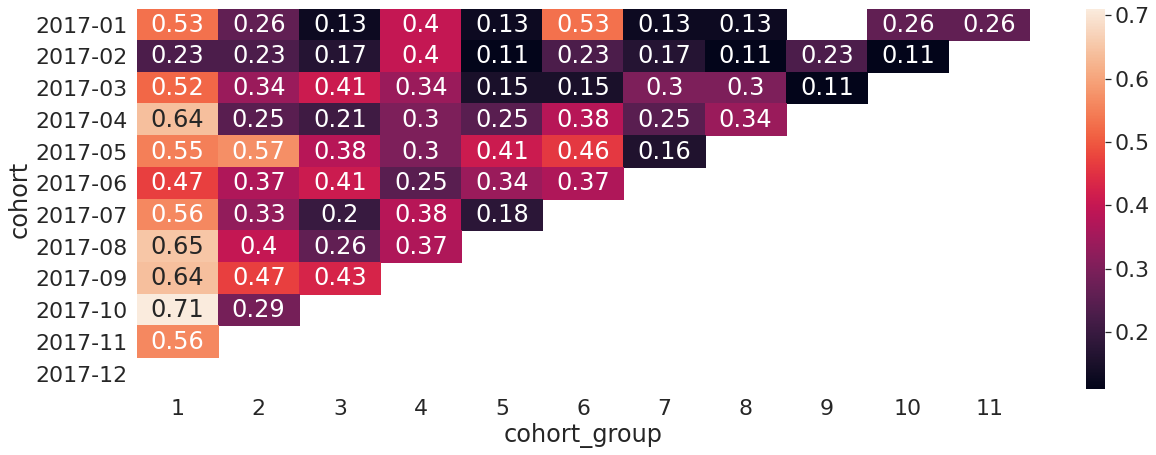

In [119]:
# Построим Heatmap для наших значений

sns.heatmap(retention,annot=True)

  

Как видно из графика наибольший retention был от 2017-09 со значением 0.43

----

## 6 задание

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: 

R - время от последней покупки пользователя до текущей даты,

F - суммарное количество покупок у пользователя за всё время, 

M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры.

Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [120]:
# Прочитаем данные
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-makarov/first_project/andrei_makarov_15.07_andreymakarovs@mail.ru/variant1/olist_order_items_dataset.csv')

# соединим таблицу items и orders
orders = orders.reset_index()
customers = customers.reset_index()

orders_w_i = pd.merge(orders, items[['order_id','product_id','price']],on='order_id', how='left')

In [121]:
df = pd.merge(orders_w_i, customers[['customer_id','customer_unique_id']],on='customer_id', how='right') 

In [122]:
df.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,customer_unique_id
0,88492,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,124.99,861eff4711a542e4b93843c6dd7febb0
1,90418,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,4aa6014eceb682077f9dc4bffebc05b0,289.00,290c77bc529b7ac935b93aa66c333dc3
2,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,139.94,060e732b5b29e8181a18229c7b0b2b5e
3,32180,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,149.94,259dac757896d24d7702b9acbbff3f3c
4,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9391a573abe00141c56e38d84d7d5b3b,230.00,345ecd01c38d18a9036ed96c73b8d066


In [123]:
# Переведем в формат даты Y-m-d
df['order_approved_month'] = df['order_approved_at'].astype('datetime64[M]') 

In [124]:
# Найдем цену каждому заказу
df = df.groupby(['order_id', 'order_approved_at', 'customer_unique_id', 'customer_id']).agg({'price': lambda x: x.sum()}).reset_index()
df.head()

,order_id,order_approved_at,customer_unique_id,customer_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,199.90


In [136]:
# Сделаем точку отсчета от даты последнего заказа
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
recency_date = df.order_approved_at.max()

In [137]:
recency_date

Timestamp('2018-09-03 17:40:06')

In [138]:
# Посчитаем количество прошедших дней со дня заказа от recency_date
df['days_since_order'] = df['order_approved_at'].apply(lambda x: (recency_date - x).days)

In [139]:
# Установим период в 365 дней
period = 365

In [140]:
df.head()


,order_id,order_approved_at,customer_unique_id,customer_id,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,58.90,355
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,239.90,495
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,199.00,232
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,12.99,26
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,199.90,576


In [141]:
rfm = df.groupby('customer_unique_id', as_index=False) \
                    .agg({'days_since_order': 'min',
                          'customer_id': 'count',
                          'price': 'sum'}) \
                    .rename(columns={'days_since_order': 'recency',
                                     'customer_id': 'frequency',
                                     'price': 'monetary'})
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


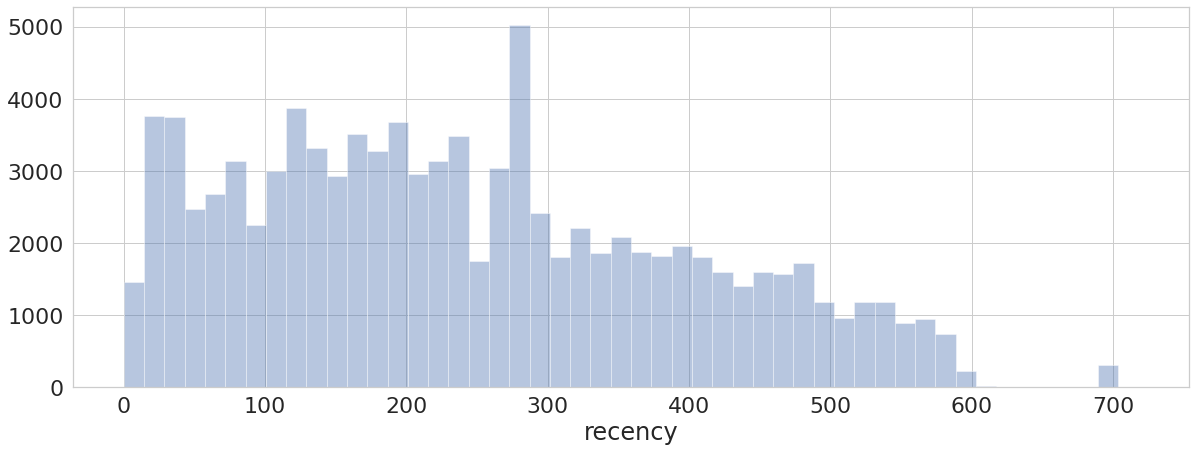

In [142]:
sns.distplot(rfm.recency, kde=False)

In [143]:
# 20-й, 40-й, 60-й и 80-й квантили параметра "recency"

rfm.recency.quantile([.098, .187, .252, .395, 0.9, 0.95])

0.098     45.0
0.187     90.0
0.252    120.0
0.395    180.0
0.900    472.0
0.950    526.0
Name: recency, dtype: float64

In [144]:
rfm.frequency.value_counts()

1     93049
2      2708
3       191
4        30
5         8
6         6
7         3
17        1
9         1
Name: frequency, dtype: int64

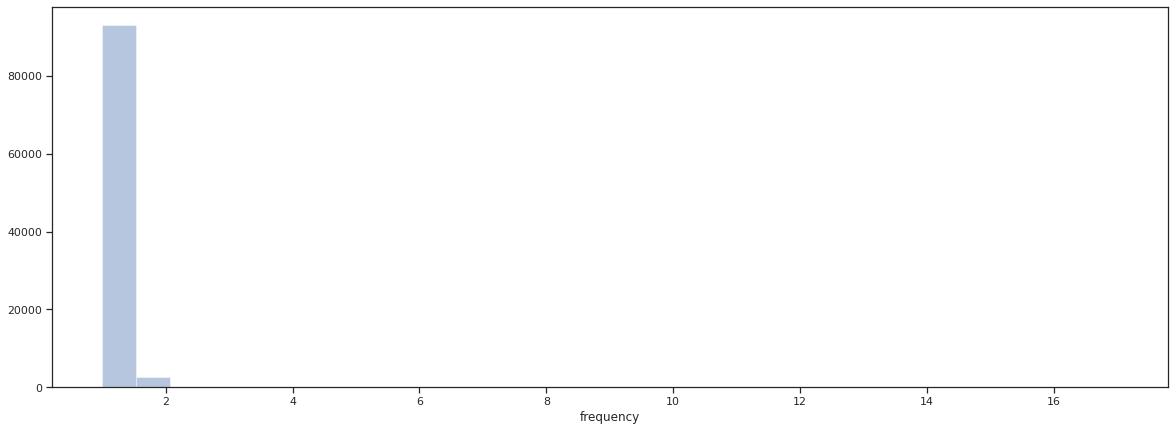

In [145]:
sns.set_theme(style="ticks")
sns.distplot(rfm.frequency, kde=False, bins=30)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


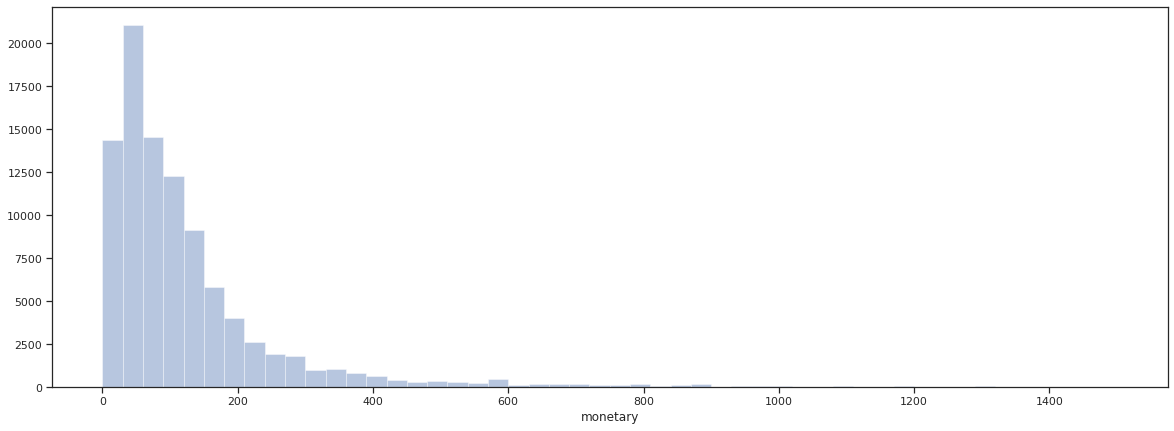

In [146]:
sns.distplot(rfm[rfm.monetary < 1500].monetary, kde=False)

In [147]:
rfm.monetary.quantile([.1, .295, .575, .882 ])

0.100     25.0
0.295     50.0
0.575    100.0
0.882    250.0
Name: monetary, dtype: float64

Квантили:

Recency можно сделать следующим образом:

До 45 дней - 5

От 45-90 дней - 4

От 90-120 - 3 

До 120-180 - 2 

Все остальное - 1

Monetary, давайте будем считать сумму покупок в долларовой валюте, так как большинство заказов находится в пределах 100:

1 - до 20$

2 - 20-50$

3 - 50-100$ 

4 - 100-250$

5 - свыше 250$

Frequency, большинство клиентов заказывало только по одному разу, поэтому будем присваивать также.

1 заказ - 1 

2 заказа - 2 

итд..

5 - свыше четырех заказов

In [148]:
quintiles = dict()

In [149]:
quintiles['recency'] = rfm['recency'].quantile([.098, .187, .252, .395, 0.9, 0.95]).to_dict()
quintiles['monetary'] = rfm['monetary'].quantile([.1, .295, .575, .882 ]).to_dict()

quintiles

{'recency': {0.098: 45.0,
  0.187: 90.0,
  0.252: 120.0,
  0.395: 180.0,
  0.9: 472.0,
  0.95: 526.0},
 'monetary': {0.1: 25.0, 0.295: 50.0, 0.575: 100.0, 0.882: 250.0}}

In [150]:
rfm.recency.quantile([.098, .187, .252, .395, 0.9, 0.95])
rfm.monetary.quantile([.1, .295, .575, .882 ])

0.100     25.0
0.295     50.0
0.575    100.0
0.882    250.0
Name: monetary, dtype: float64

In [151]:
def r_score(x):
    if x <= quintiles['recency'][.098]:
        return 5
    elif x <= quintiles['recency'][.187]:
        return 4
    elif x <= quintiles['recency'][.252]:
        return 3
    elif x <= quintiles['recency'][.395]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quintiles['monetary'][.1]:
        return 1
    elif x <= quintiles['monetary'][.295]:
        return 2
    elif x <= quintiles['monetary'][.575]:
        return 3
    elif x <= quintiles['monetary'][.882]:
        return 4
    else:
        return 5    
    
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x ==3:
        return 3
    elif x == 4:
        return 4
    else:
        return 5

In [152]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,4,314
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,3,113
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,2,112
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,4,114


In [153]:
rfm_count = rfm.groupby('RFM_Score', as_index=False).agg({'customer_unique_id':'count'})
rfm_count['share'] = (rfm_count.customer_unique_id / rfm_count.customer_unique_id.sum()*100).round(2)
rfm_count = rfm_count.sort_values('share',ascending=False)

rfm_count.head(10)

,RFM_Score,customer_unique_id,share
3,114,16511,17.20
2,113,16278,16.96
1,112,11170,11.64
0,111,6228,6.49
4,115,6187,6.44
23,214,4271,4.45
22,213,3602,3.75
67,514,2833,2.95
53,414,2724,2.84
21,212,2566,2.67


In [154]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,4,314,about to sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311,about to sleep
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,3,113,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,2,112,hibernating
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,4,114,hibernating


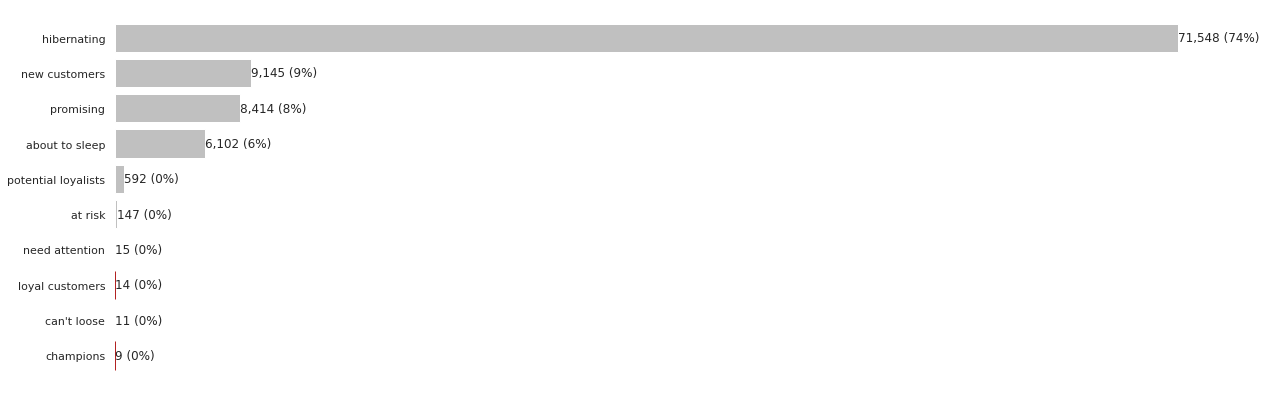

In [155]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Как видно из графика RFM наибольшая часть наших клиентов это hibernating около 71%, что является очень удручающим моментом из нашего анализа. Практически большинство наших клиентов не конвертятся на вторую или последующую покупку.

Таким образом следует уделить большой акцент на Retention и удержание клиента.

Инструментами для этого могут послужить:

1) Персональные скидки.

2) Рассылки, push-уведомления

3) Расширение товарного ассортимента

и.т.п.

Также у нас имеется небольшое количество новых и многообещаюших клиентов, следует обратить на них внимание.

## Спасибо за уделенное время!